In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta, gamma
from scipy.optimize import fsolve
import pandas as pd

In [2]:
def equations(vars, alpha, beta, k):
    delta, theta = vars
    mu = alpha / (alpha + beta)
    var = (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1))

    eq1 = theta - mu
    eq2 = (theta * (1 - theta) * delta ** 2) / (2 * k + delta ** 2) - var

    return [eq1, eq2]

def simulate_jacobi_process(k, theta, delta, T, dt, initial_value):
    N = int(T / dt)  # Number of steps
    t = np.linspace(0, T, N)
    y = np.zeros(N)
    y[0] = initial_value

    for i in range(1, N):
        y_t = y[i-1]
        drift = k * (theta - y_t) * dt
        diffusion = delta * np.sqrt(y_t * (1 - y_t) * dt) * np.random.normal()
        y[i] = y_t + drift + diffusion

        # Ensure that the process stays within the bounds [0, 1]
        if y[i] < 0:
            y[i] = 0
        elif y[i] > 1:
            y[i] = 1

    return t, y


In [3]:
path = r'C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 01 - DIPU\Estimation\pv\clusterPV\post 2015'

cluster_0 = pd.read_csv(path + r"\cluster_0.csv")

# Convert the timestamp to a date format
cluster_0['date'] = pd.to_datetime(cluster_0['Unnamed: 0'])

# Extract the "electricity" column
electricity_data = cluster_0['electricity']

# Reshape the data for fitting
electricity_data = electricity_data[(electricity_data > 0) & (electricity_data < 1)]

# Provide initial parameter guesses
initial_alpha = 1
initial_beta = 1

# Fit a Beta distribution to the normalized data with initial guesses
alpha, beta_params, loc, scale = beta.fit(electricity_data, floc=0, fscale=1, loc=initial_alpha, scale=initial_beta)

# Generate values for the Beta distribution
x = np.linspace(0, 1, 1000)
pdf_beta = beta.pdf(x, alpha, beta_params, loc, scale)

# # Plot the histogram of the data and the fitted Beta distribution
# plt.figure(figsize=(10, 6))
# sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
# plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')
# plt.title('Fitting Beta Distribution to Normalized Electricity Data - cluster_0')
# plt.xlabel('Normalized Electricity')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

# Print the parameters of the fitted Beta distribution
print("Beta Distribution Parameters:")
print("Alpha:", alpha)
print("Beta:", beta_params)
print("Location:", loc)
print("Scale:", scale)

Beta Distribution Parameters:
Alpha: 0.7275099037881647
Beta: 1.856255806739225
Location: 0
Scale: 1


In [4]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Cluster', 'Alpha', 'Beta'])

# Iterate through files in the directory
for filename in os.listdir(path):
    if filename.startswith("cluster") and filename.endswith(".csv"):
        # Read the CSV file
        cluster_df = pd.read_csv(os.path.join(path, filename))

        # Extract the "electricity" column
        electricity_data = cluster_df['electricity']


        # Reshape the data for fitting
        s = electricity_data.mean() # squeezer
        electricity_data = (electricity_data*(len(electricity_data)-1)+s)/len(electricity_data)
        # electricity_data = electricity_data[(electricity_data > 0) & (electricity_data < 1)]

        # Provide initial parameter guesses
        initial_alpha = 1
        initial_beta = 1

        # Fit a Beta distribution to the normalized data with initial guesses
        alpha, beta_params, loc, scale = beta.fit(electricity_data, floc=0, fscale=1, loc=initial_alpha, scale=initial_beta)

        # Create a DataFrame with the current result
        result_df = pd.DataFrame({'Cluster': [filename], 'Alpha': [alpha], 'Beta': [beta_params], 'Mean': np.array(electricity_data).mean() , 'Sd': np.array(electricity_data).std()})

        # Concatenate the current result to the main results DataFrame
        results_df = pd.concat([results_df, result_df], ignore_index=True)

        # Generate values for the Beta distribution and plot
        x = np.linspace(0, 1, 1000)
        pdf_beta = beta.pdf(x, alpha, beta_params, loc, scale)

        # plt.figure(figsize=(10, 6))
        # sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
        # plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')
        # plt.title(f'Fitting Beta Distribution to Normalized Electricity Data - {filename}')
        # plt.xlabel('Normalized Electricity')
        # plt.ylabel('Density')
        # plt.legend()
        # plt.show()

# Print the DataFrame with results
print(results_df)


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_26532\3899981532.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result_df], ignore_index=True)


           Cluster     Alpha      Beta      Mean        Sd
0    cluster_0.csv  0.135229  0.981694  0.144729  0.222711
1    cluster_1.csv  0.135622  1.034540  0.138859  0.213387
2   cluster_10.csv  0.135355  1.102188  0.129336  0.203858
3   cluster_11.csv  0.135596  1.096705  0.130560  0.204182
4   cluster_12.csv  0.135661  1.025756  0.139903  0.215041
5   cluster_13.csv  0.136273  1.061132  0.136405  0.208621
6   cluster_14.csv  0.134483  1.109493  0.127168  0.203335
7   cluster_15.csv  0.134725  1.125012  0.125470  0.201221
8   cluster_16.csv  0.135194  1.060550  0.134824  0.209394
9   cluster_17.csv  0.134505  1.111051  0.127054  0.202974
10  cluster_18.csv  0.135894  1.016690  0.142042  0.215713
11  cluster_19.csv  0.135026  1.082456  0.131324  0.206547
12   cluster_2.csv  0.136125  1.056517  0.136712  0.209449
13  cluster_20.csv  0.135493  1.037191  0.138021  0.213334
14  cluster_21.csv  0.135317  1.091092  0.130944  0.204971
15  cluster_22.csv  0.135761  1.037935  0.138479  0.2128

In [5]:
# Initialize an empty DataFrame to store results

aggregated_factor = {}

for filename in os.listdir(path):
    if filename.startswith("cluster") and filename.endswith(".csv"):
        cluster_df = pd.read_csv(os.path.join(path, filename))
        aggregated_factor[filename] = cluster_df['electricity']

all_electricity_df = pd.DataFrame(aggregated_factor)
mean_series = all_electricity_df.mean(axis=1)

# Reshape the data for fitting
s = mean_series.mean() # squeezer
mean_series = (mean_series*(len(mean_series)-1)+s)/len(mean_series)

print("Moyenne: ", mean_series.mean())
print("Std: ", mean_series.std())

Moyenne:  0.13466841773114355
Std:  0.19892012058792327


0.14147295191172277 1.1230233237708842


C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_26532\364764396.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_series, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_26532\364764396.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


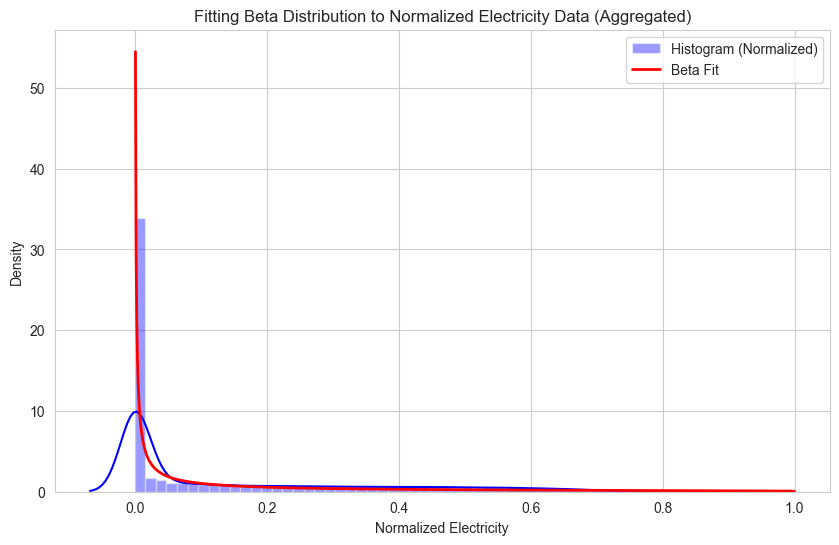

In [6]:
# Provide initial parameter guesses
initial_alpha = 1
initial_beta = 1

# Fit a Beta distribution to the normalized data with initial guesses
alpha_fit, beta_fit, loc, scale = beta.fit(mean_series, floc=0, fscale=1, loc=initial_alpha, scale=initial_beta)

print(alpha_fit, beta_fit)

# Generate values for the Beta distribution and plot
x = np.linspace(0, 1, 1000)
pdf_beta = beta.pdf(x, alpha_fit, beta_fit, loc, scale)

plt.figure(figsize=(10, 6))
sns.distplot(mean_series, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')
plt.title(f'Fitting Beta Distribution to Normalized Electricity Data (Aggregated)')
plt.xlabel('Normalized Electricity')
plt.ylabel('Density')
plt.legend()
plt.show()


In [7]:
k = 0.185

# Initial guesses for k and theta
initial_guesses = [0.4, 0.075]  # Initial guess for k and theta

theta_fit, delta_fit = fsolve(equations, initial_guesses, args=(alpha_fit, beta_fit, k))

print("Estimated theta:", theta_fit)
print("Estimated delta:", delta_fit)

Estimated theta: 0.5409312662841701
Estimated delta: 0.11188087670353326


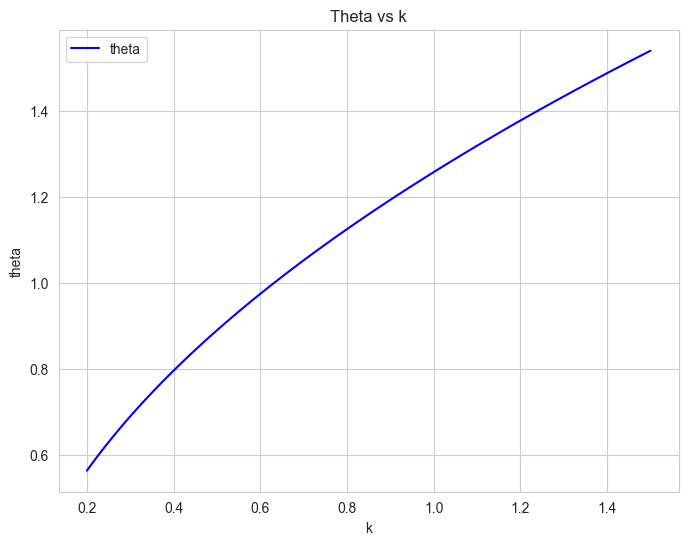

In [8]:
# Initialize lists to store results
k_values = np.linspace(0.2, 1.5, 101)
theta_values = []
delta_values = []

# Loop over different values of k
for k in k_values:
    # Initial guesses for delta and theta
    initial_guesses = [0.4, 0.075]

    # Solve the equations
    solution = fsolve(equations, initial_guesses, args=(alpha_fit, beta_fit, k))
    theta, delta = solution

    theta_values.append(theta)
    delta_values.append(delta)

    initial_guesses = solution

plt.figure(figsize=(8, 6))
plt.plot(k_values, theta_values, label='theta', color='blue')
plt.xlabel('k')
plt.ylabel('theta')
plt.title('Theta vs k')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Parameters
k = 0.001
T = 52608
dt = 1  # Time step in hours
initial_value = mean_series[0]  # Initial value of the process

print(theta_fit)


0.5409312662841701


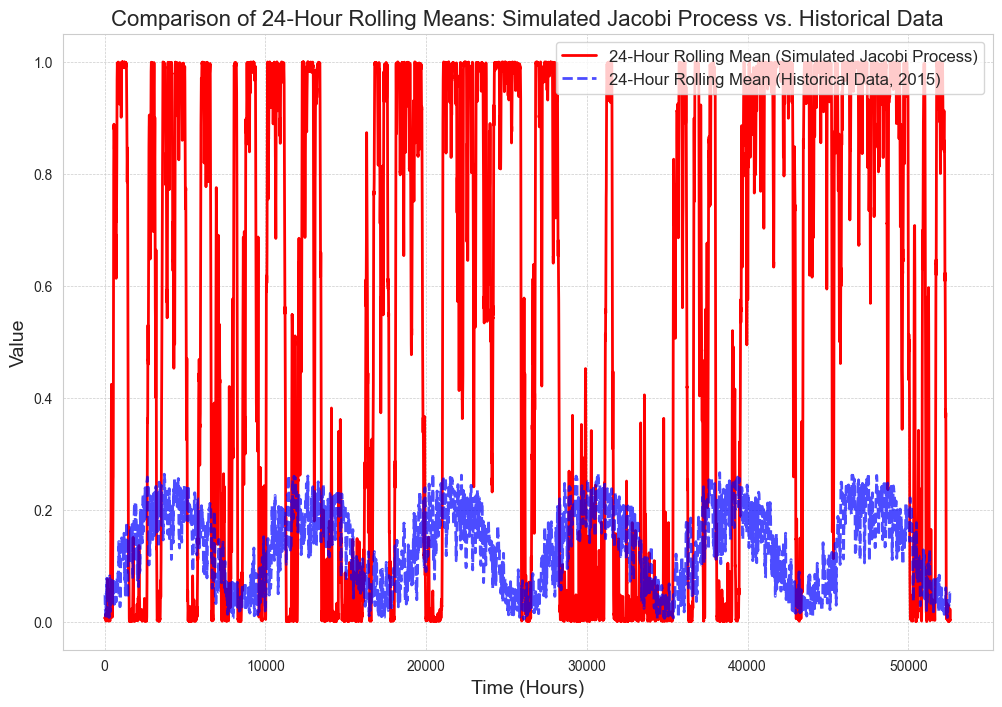

In [14]:
# Simulate the Jacobi process
t, y = simulate_jacobi_process(k, theta_fit, delta_fit, T, dt, initial_value)

# Create a DataFrame for rolling window calculation
df = pd.DataFrame({'time': t, 'value_jacobi': y, 'value_histo': mean_series})

# Calculate the rolling mean with a 24-hour window
rolling_mean_j = df['value_jacobi'].rolling(window=24).mean()
rolling_mean_h = df['value_histo'].rolling(window=24).mean()

# Plot the simulated series and the rolling mean
plt.figure(figsize=(12, 8))

# Plot the 24-hour rolling means
plt.plot(df['time'], rolling_mean_j, label='24-Hour Rolling Mean (Simulated Jacobi Process)', color='red', linewidth=2)
plt.plot(df['time'], rolling_mean_h, label='24-Hour Rolling Mean (Historical Data, 2015)', color='blue', linestyle='--', linewidth=2, alpha=0.7)

# Add labels and title
plt.xlabel('Time (Hours)', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Comparison of 24-Hour Rolling Means: Simulated Jacobi Process vs. Historical Data', fontsize=16)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()
